In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('/content/marketing_investimento.csv')

In [6]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


analises exploratória

In [8]:
import plotly.express as px

analise categorica, texto

In [9]:
px.histogram(dados, x ='aderencia_investimento', text_auto=True)

In [10]:
px.histogram(dados, x ='estado_civil', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

In [11]:
px.histogram(dados, x ='escolaridade', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

In [12]:
px.histogram(dados, x ='inadimplencia', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

In [13]:
px.histogram(dados, x ='fez_emprestimo', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

analise exploratória numerica

In [14]:
px.box(dados, x ='idade', color = 'aderencia_investimento')

In [15]:
px.box(dados, x ='saldo', color = 'aderencia_investimento')

In [16]:
px.box(dados, x ='tempo_ult_contato', color = 'aderencia_investimento')

In [17]:
px.box(dados, x ='numero_contatos', color = 'aderencia_investimento')

In [18]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [19]:
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

In [20]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [21]:
y

,aderencia_investimento
0,sim
1,sim
2,nao
3,sim
4,sim
...,...
1263,sim
1264,sim
1265,sim
1266,sim


transformando as variaveis explicativas

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
colunas = x.columns

In [24]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
    ),
    remainder = 'passthrough',
    sparse_threshold=0)


In [25]:
x = one_hot.fit_transform(x)

In [26]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [27]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_ecoder = LabelEncoder()

In [30]:
Y = label_ecoder.fit_transform(y)

In [31]:
y

,aderencia_investimento
0,sim
1,sim
2,nao
3,sim
4,sim
...,...
1263,sim
1264,sim
1265,sim
1266,sim


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, Y, stratify = Y, random_state= 5)

In [34]:
from sklearn.dummy import DummyClassifier

In [37]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937

arvore de decisão

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
arvore = DecisionTreeClassifier(random_state = 5)
arvore.fit(x_treino, y_treino)


DecisionTreeClassifier(random_state=5)

In [41]:
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [42]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [44]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contrato',
                'numero_contratos']

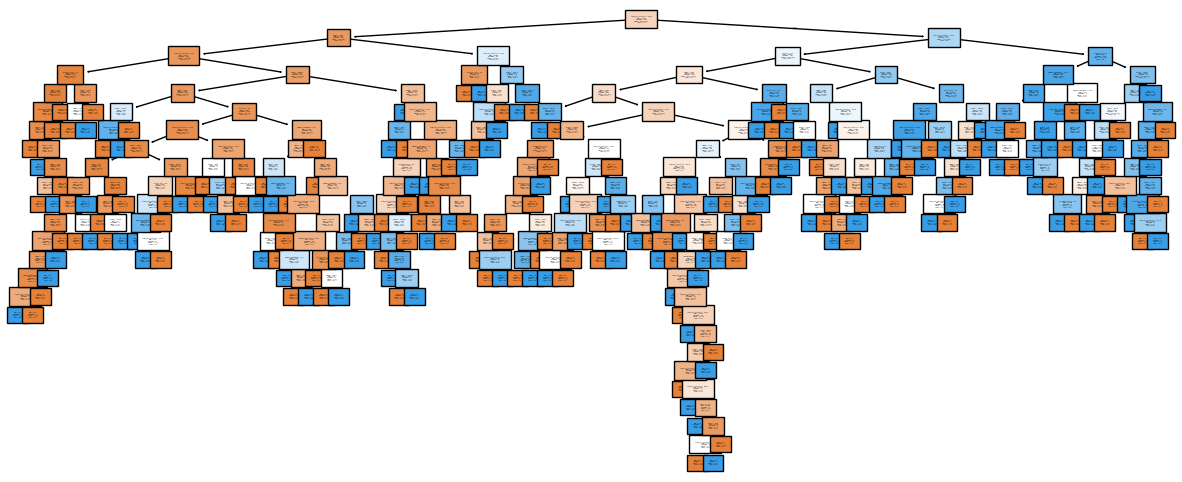

In [46]:
plt.figure(figsize = (15,6))
plot_tree(arvore,  filled = True, class_names = ['nao', 'sim'], fontsize= 1, feature_names = nome_colunas);

In [47]:
arvore.score(x_treino, y_treino)

1.0

In [48]:
arvore = DecisionTreeClassifier(max_depth= 3, random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [49]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [50]:
arvore.score(x_teste, y_teste)

0.7160883280757098

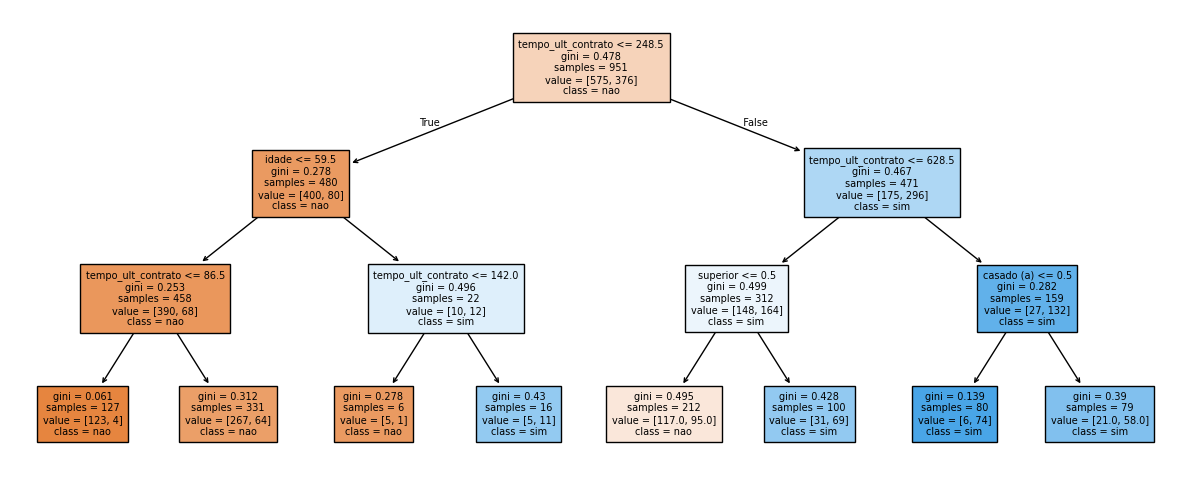

In [51]:
plt.figure(figsize = (15,6))
plot_tree(arvore,  filled = True, class_names = ['nao', 'sim'], fontsize= 7, feature_names = nome_colunas);

algoritimo de nn

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
Knn = KNeighborsClassifier()
Knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [57]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [58]:
Knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

In [59]:
print(f'acuracia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'acuracia Arvore: {arvore.score(x_teste, y_teste)}')
print(f'acuracia Knn: {Knn.score(x_teste_normalizado, y_teste)}')

acuracia Dummy: 0.6025236593059937
acuracia Arvore: 0.7160883280757098
acuracia Knn: 0.6876971608832808


In [60]:
import pickle

In [61]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

In [62]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

In [63]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [75]:
novo_dado = {
    'idade': [40],
    'estado_civil': ['solteiro (a)'],
    'escolaridade': ['medio'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'tempo_ult_contato': [800],
    'numero_contatos': [4],
    'fez_emprestimo': ['nao'],
}

In [76]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,tempo_ult_contato,numero_contatos,fez_emprestimo
0,40,solteiro (a),medio,nao,23040,800,4,nao


In [77]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [78]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])